In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [3]:
cars = pd.read_csv("../Data/car_prices.csv", on_bad_lines='skip')

In [4]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Numeric Variable Relationships

Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

* Why do you think the relationship between `sellingprice` and `mmr` (the recommended selling price) is so strong?
* What is the relationship between `sellingprice` and `year` (the year the car was manufactured). Does this make sense?
* Once you've looked at the two relationships above, filter your dataframe down to the `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 

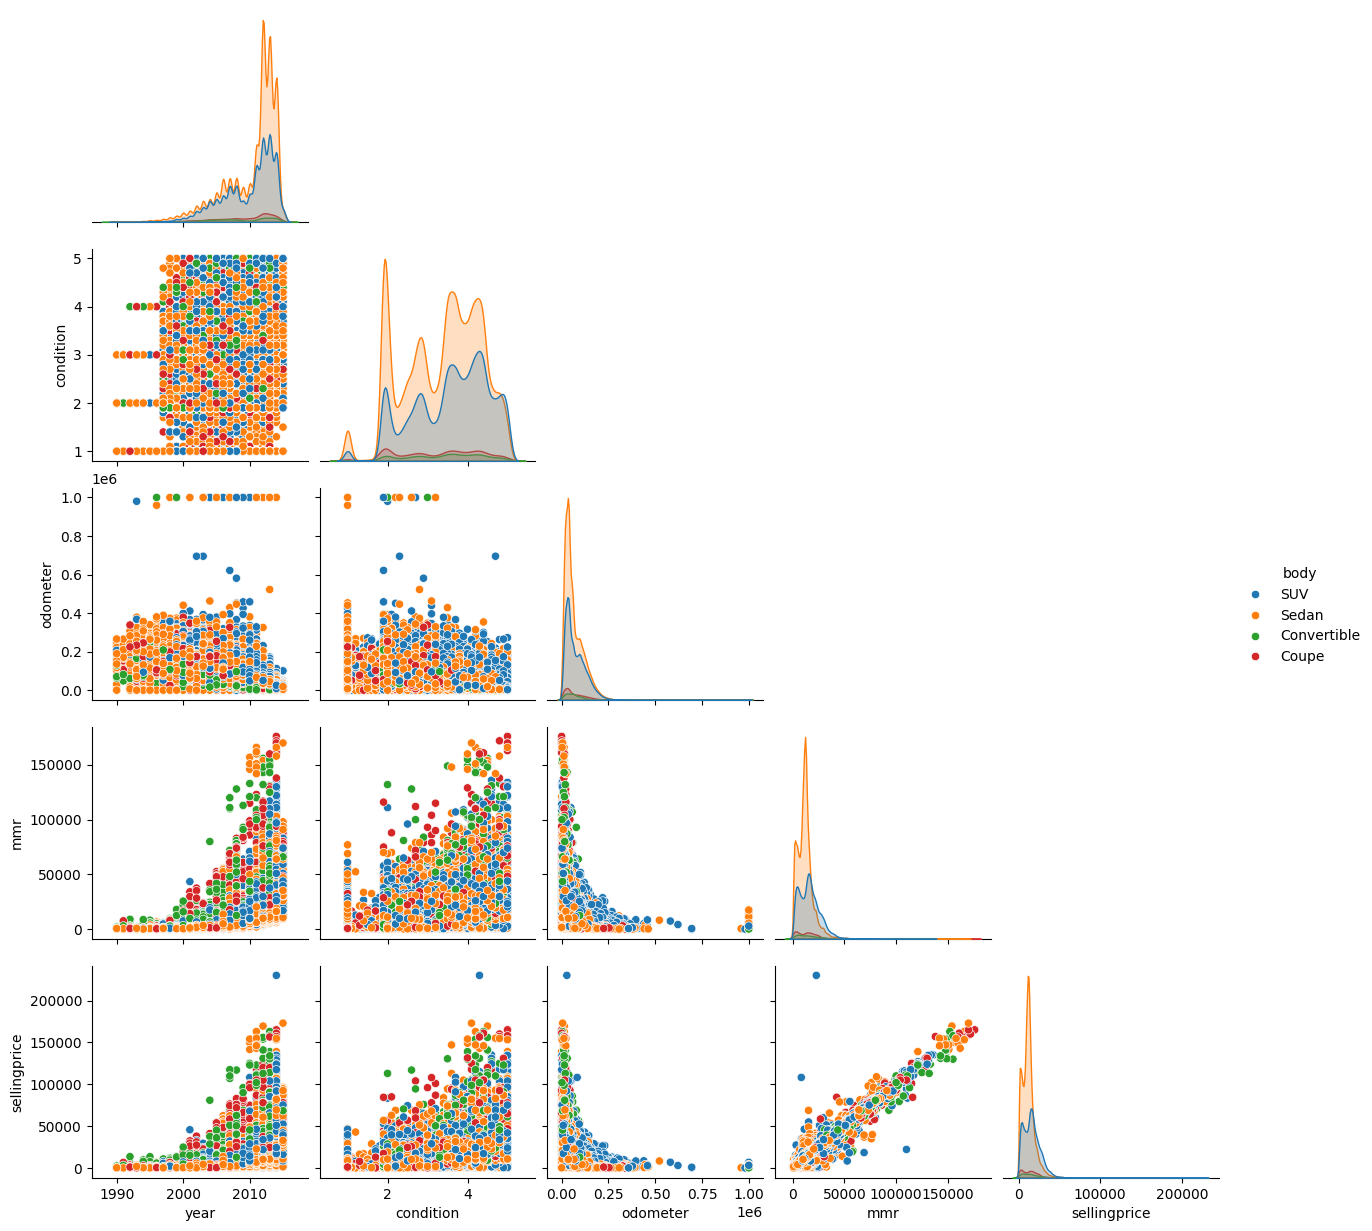

In [9]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

sns.pairplot(cars.query("body in @style_list"), 
             hue = "body",
             corner = True)

#### Correlation Heat Map

* Plot a heatmap of the correlation between the numeric variables. Does it make sense year and condition and odomoter are negatively correlated?


<Axes: >

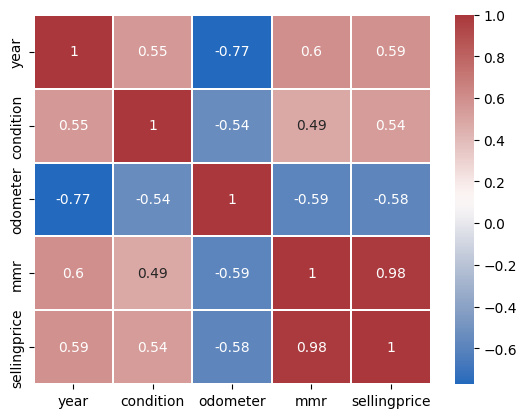

In [10]:
sns.heatmap(cars.select_dtypes(include='number').corr(), 
            linewidth = 0.01, 
            cmap = "vlag",
            annot = True)

#### Value Retention

* Filter your data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* Build a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.

* If you want to fit a regression with scipy.stats, use dropna() on the dataframe first.

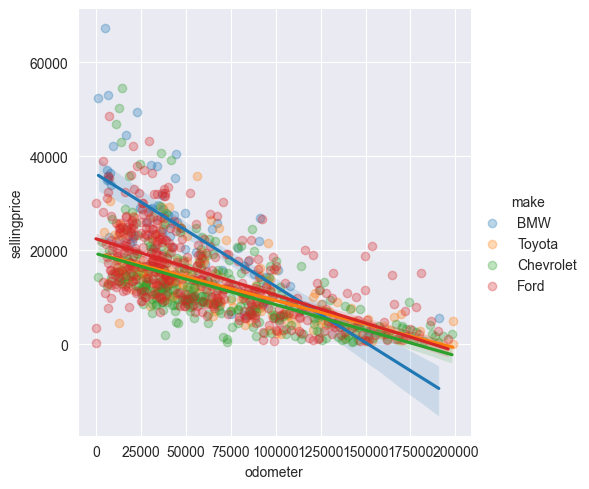

In [178]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

cars_sub = cars.query("make in @brand_list").dropna(subset = ['odometer'])

p = sns.lmplot(
    x = "odometer",
    y = "sellingprice",
    hue = "make",
    data=cars.query("make in @brand_list and sellingprice <150000 and odometer < 200000").sample(1000),
    scatter_kws=({"alpha": .3}),
    #col = "make"
)


In [25]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])

LinregressResult(slope=np.float64(-0.10686305954841462), intercept=np.float64(20818.284085956435), rvalue=np.float64(-0.5773849819198589), pvalue=np.float64(0.0), stderr=np.float64(0.00021987650761310962), intercept_stderr=np.float64(18.587962282863657))

In [ ]:
for brand in brand_list:
    data = cars_regress.loc[cars_regress["make"] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (-0.09953734771818873, 20840.011075886512)
BMW: (-0.2225033042967633, 35567.979744684795)
Toyota: (-0.07594777614361671, 17813.017107685304)
Chevrolet: (-0.08841045962774957, 18705.587357485063)


# Categorical Variable Relationships

* Bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Build a barplot of the average price by condition bin.

<Axes: xlabel='condition_bins', ylabel='sellingprice'>

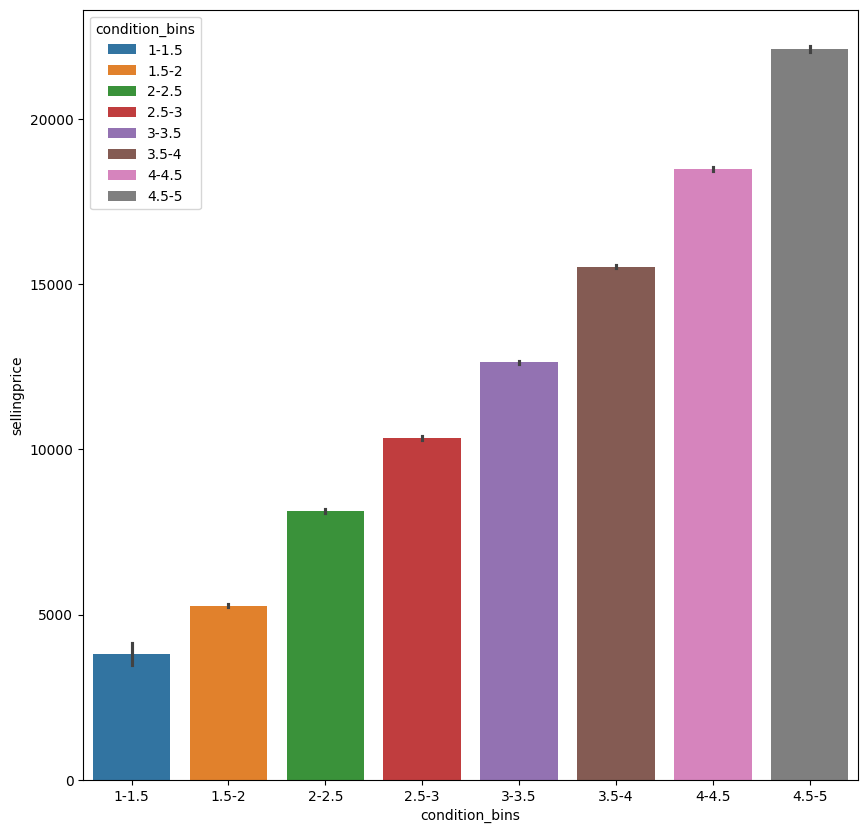

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

cars["condition_bins"] = pd.cut(cars["condition"], bins=bins, labels=labels)

sns.barplot(
    x = "condition_bins",
    y = "sellingprice",
    data = cars, 
    hue = "condition_bins"
)




# Price by make and condition

* Create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. Consider using value_counts to get the top 10 most common brands.

* Once you've created the table, build a heatmap from the data. Which brands and quality levels have the highest selling prices? Does this match your expecations?

In [ ]:
top10_makes = cars.value_counts("make").iloc[:10].index.tolist()

cars_pivot = (
 
    .pivot_table(
        index = "make",
        columns = "condition_bins", 
        values = "sellingprice",
        aggfunc = "mean" 
    )
)

cars_pivot

   cars
    .query("make in @top10_makes")

/var/folders/mv/y6dng09x31s7lvvx2x62hf1r0000gn/T/ipykernel_57240/1590590028.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556
Honda,5418.181818,5013.392857,7924.010577,9179.641598,11618.430007,13724.741442,16415.864917,19317.726330
Hyundai,3089.285714,5124.115218,7283.134792,8600.312323,10312.067568,11704.661821,13483.934264,16502.773497
Kia,4710.000000,4208.728571,6639.857005,8147.949483,10236.522039,11998.424662,13986.038947,16246.605411
Nissan,4592.682927,5509.596553,8431.096744,10016.940794,11893.454024,13056.597333,14654.276116,16105.622175


condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556


np.float64(11900.0)

<Axes: xlabel='condition_bins', ylabel='make'>

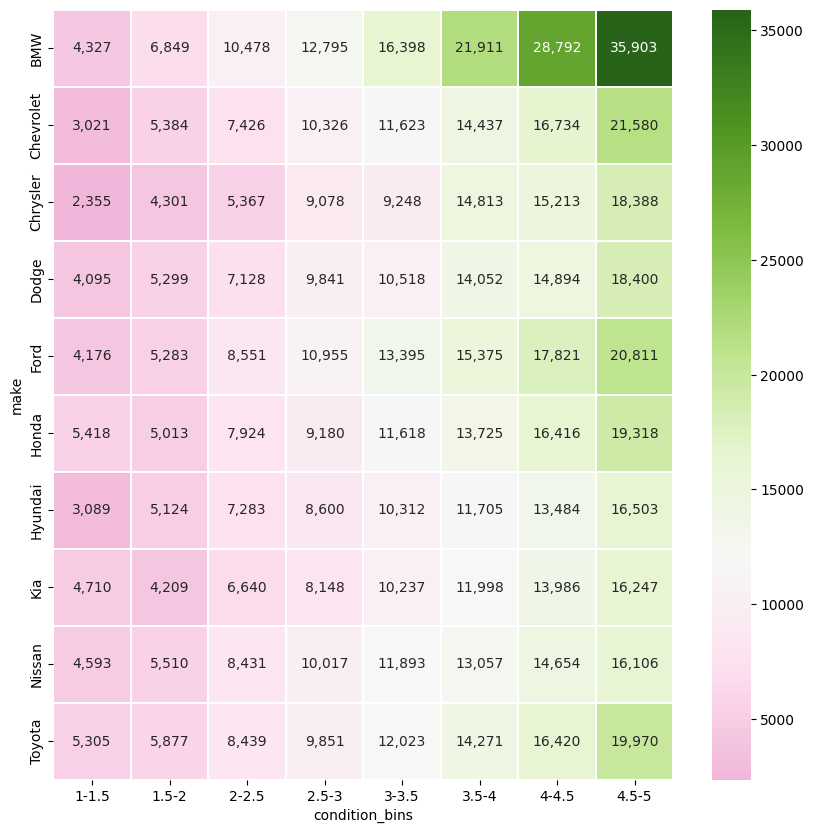

In [69]:
fig, ax = plt.subplots(figsize = (10, 10))

median_val = cars.query("make in @top10_makes").loc[:, "sellingprice"].median()

sns.heatmap(cars_pivot,
            linewidth = 0.01, 
            cmap = "PiYG",
            annot = True,
            fmt=',.0f',
            center = median_val)

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filter your data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [70]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


<Axes: xlabel='sellingprice', ylabel='Count'>

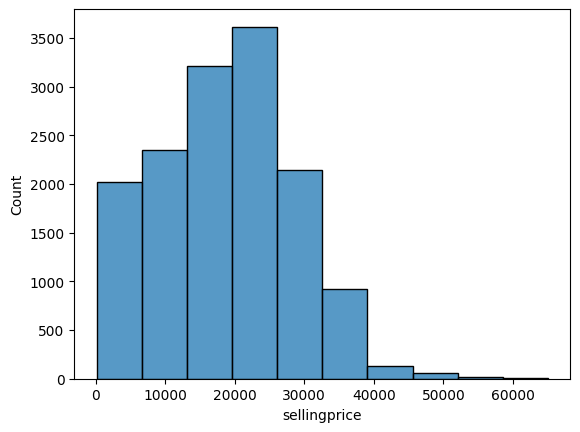

In [75]:
sns.histplot(
    x = "sellingprice",
    data = f150s,
    bins = 10
)

* Build a barplot of `sellingprice` by `trim` for the F150s.

<Axes: xlabel='sellingprice', ylabel='trim'>

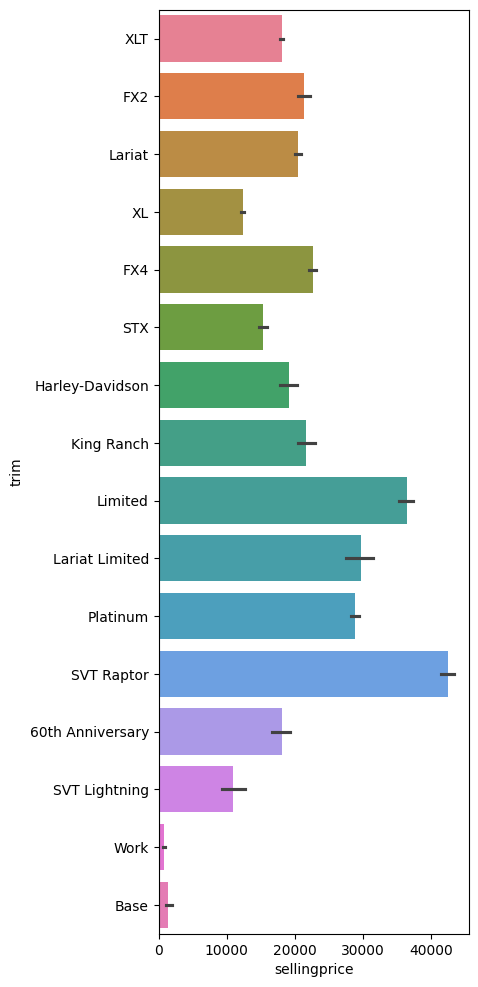

In [83]:
fig, ax = plt.subplots(figsize = (4, 12))
sns.barplot(
    x = "sellingprice",
    y = "trim",
    hue = "trim",
    data = f150s,
    
)

* Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, build a jointplot of `condition` (not binned) by `sellingprice`.

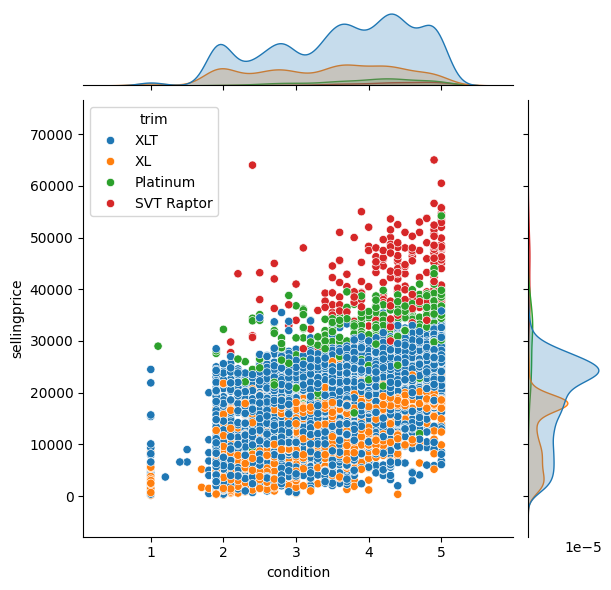

In [85]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

sns.jointplot(
    x = "condition",
    y = "sellingprice",
    hue = "trim",
    data = f150s.query("trim in @trim_list")
)

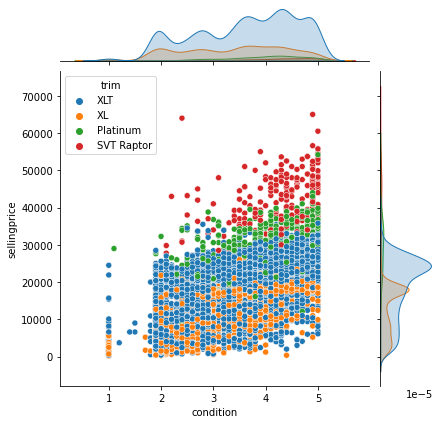

### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.
* Which color sells for more than the recommended price?

In [ ]:
f150s["diff_to_mmer"] = f150s["sellingprice"] - f150s["mmr"]

#f150s = f150s.assign(diff_to_mmr = f150s["sellingprice"] - f150s["mmr"])

/var/folders/mv/y6dng09x31s7lvvx2x62hf1r0000gn/T/ipykernel_57240/599927125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f150s["diff_to_mmer"] = f150s["sellingprice"] - f150s["mmr"]


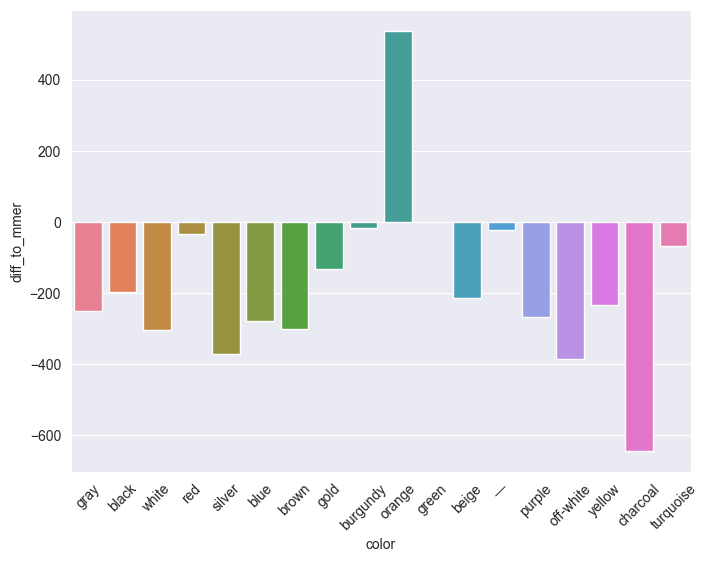

In [156]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(
    x="color",
    y="diff_to_mmer",
    hue = "color",
    data=f150s,
    errorbar=None
)

plt.xticks(rotation=45)
ax.legend_.remove()
plt.show()

In [104]:
f150s_sub = f150s.query("color != 'orange' & year.between(2009, 2014) & trim in @trim_list")

f150s_sub.value_counts(["year", "trim"])

year  trim      
2013  XLT           1144
2011  XLT           1058
2014  XLT            910
      XL             888
2012  XLT            888
2010  XLT            618
2009  XLT            213
2011  XL             193
2010  XL             151
2012  XL             134
2013  XL             130
2012  Platinum       124
2010  Platinum       115
2013  Platinum        92
2011  Platinum        84
2009  XL              68
2013  SVT Raptor      57
2012  SVT Raptor      52
2011  SVT Raptor      44
2009  Platinum        41
2010  SVT Raptor      34
2014  Platinum        30
      SVT Raptor      26
Name: count, dtype: int64

* Further filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

/var/folders/mv/y6dng09x31s7lvvx2x62hf1r0000gn/T/ipykernel_57240/3852241199.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(data = f150s_sub.pivot_table(index = "trim",


<Axes: xlabel='condition_bins', ylabel='trim'>

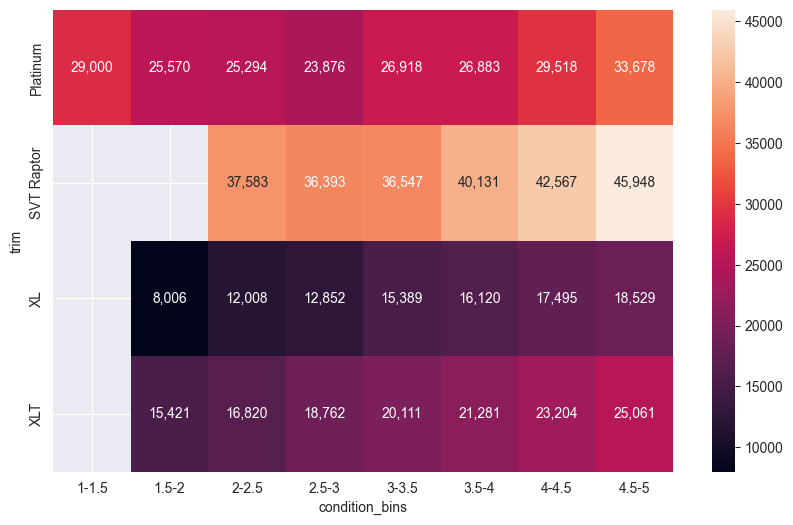

In [157]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(data = f150s_sub.pivot_table(index = "trim", 
                      columns = "condition_bins", 
                      values = "sellingprice", 
                      aggfunc = "mean"), 
            annot = True,
            fmt=',.0f'
)

### Best state to buy trucks in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5. Your DataFrame should only have trucks with a quality of 3.5 or greater.
* Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

In [182]:

f150s_XLT = (
    f150s_sub
    .query("trim == 'XLT' & condition >= 3.5")
    .groupby("state")
    .agg(mean_diff = ("diff_to_mmer", "mean"), 
         auto_count = ("state", "count"))
    )

Text(0, 0.5, 'Auto Count')

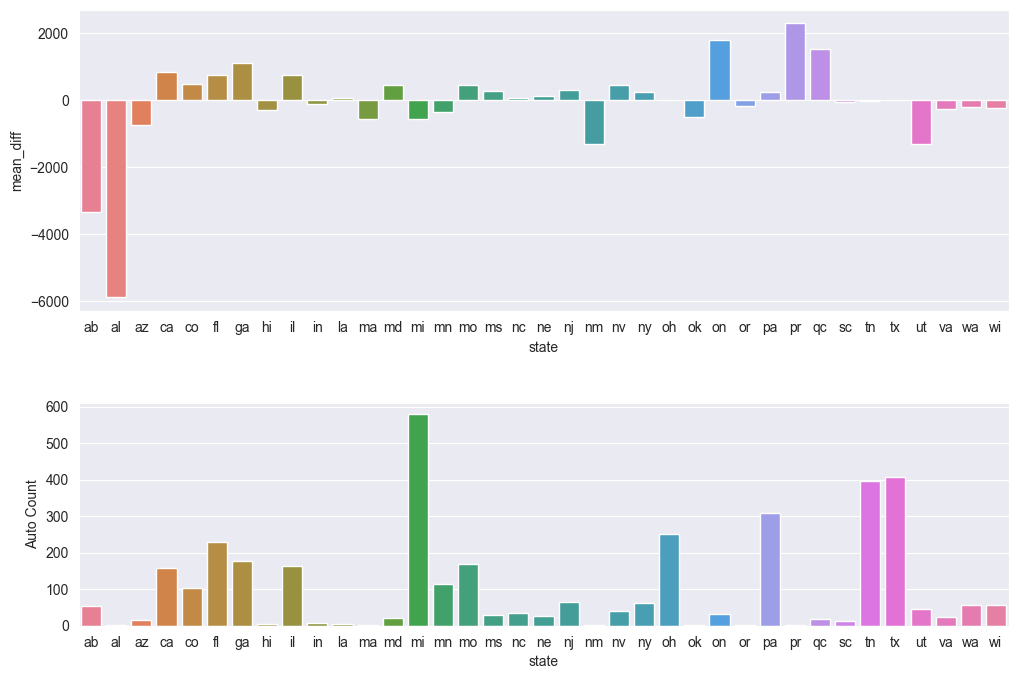

In [159]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 8))

gs = gridspec.GridSpec(nrows=8, ncols=8)

ax1 = fig.add_subplot(gs[0:4, :])

sns.barplot(x = "state", 
            y = "mean_diff",
            data = f150s_XLT,
            hue = "state",
            errorbar = None,
            ax = ax1)

ax2 = fig.add_subplot(gs[5:, :])
sns.barplot(y = "auto_count",
            x = "state",
            data = f150s_XLT,
            hue = "state",
            errorbar = None,
            ax = ax2)
ax2.set_ylabel("Auto Count")


<Axes: xlabel='state', ylabel='auto_count'>

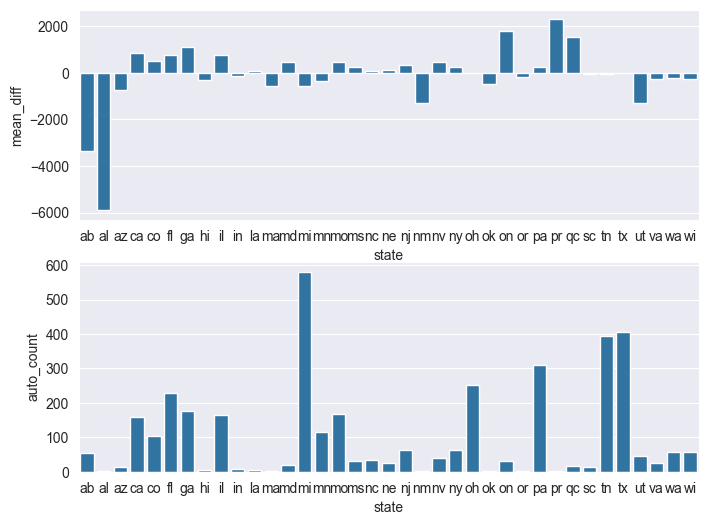

In [155]:
fig, ax = plt.subplots(2, figsize=(8, 6))

sns.barplot(
 x="state",
 y="mean_diff",
 data = f150s_XLT,
 ax=ax[0]
)

sns.barplot(
 x="state",
 y="auto_count",
 data = f150s_XLT,
 ax=ax[1]
)


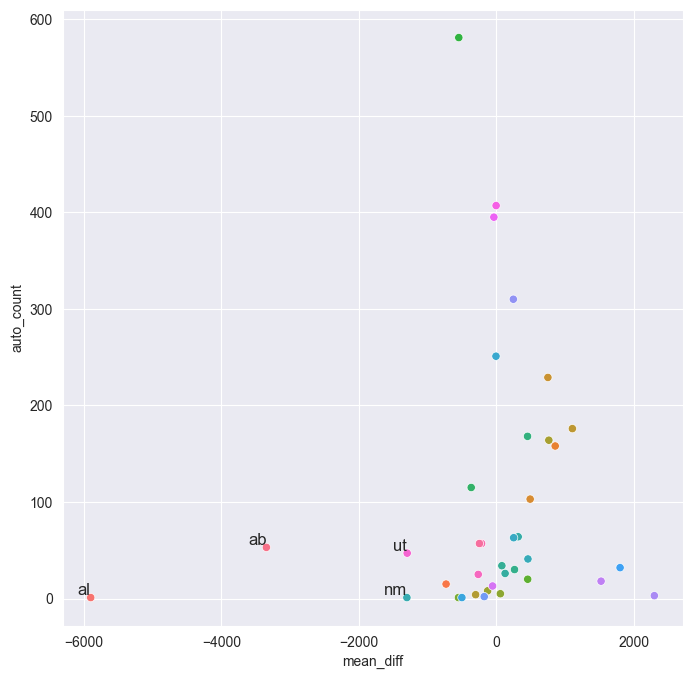

In [196]:
# Wouldn't it make more sense to make a scatter plot of these two?
fig, ax = plt.subplots(figsize = (8, 8))
sns.scatterplot(data = f150s_XLT, x = "mean_diff", y = "auto_count", hue = "state")

# Choose which states you want to label
states_to_label = ['ab', 'al', 'nm', 'ut']

# Loop through only the points you want to label
for i, row in f150s_XLT.iterrows():
    if i in states_to_label:  # <-- 'i' is the index (state name)
        ax.text(row['mean_diff'], row['auto_count'], i,
                fontsize=12, ha='right', va='bottom')

ax.legend_.remove()

* Ok, looks like Utah (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by saledate - feel free to return just a table. 

In [180]:
(
    f150s_sub
    .query("trim == 'XLT' & state == 'ut' & condition > 3.5 ")
    .groupby("saledate")
    .agg({"diff_to_mmer":["mean", "count"]})
)
    

diff_to_mmer      
                                                mean count
saledate                                                  
Wed Feb 04 2015 03:30:00 GMT-0800 (PST) -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST) -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST) -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT) -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST) -1237.500000     4

In [166]:
cars.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'condition_bins'],
      dtype='object')